# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_cloud = []
city_wind = []
city_country = []
city_date = []

In [4]:
print("Beginning Data Retrieval")
print("-----------------------------")

index = 0
set_count = 1

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


for x in cities: 
    try:
        response = requests.get(query_url + x).json()
        
        city_name.append(response["name"])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        city_max_temp.append(response['main']['temp_max'])
        city_humidity.append(response['main']['humidity'])
        city_cloud.append(response['clouds']['all'])
        city_wind.append(response['wind']['speed'])
        city_country.append(response['sys']['country'])
        city_date.append(response['dt'])
        
        if index > 49:
            index = 0
            set_count += 1
        else:
            index += 1
            
        print(f"Processing Record {index} of Set {set_count} | {x}")
           
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kamaishi
Processing Record 2 of Set 1 | sao joao da barra
Processing Record 3 of Set 1 | nantucket
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | ponta delgada
City not found. Skipping...
Processing Record 6 of Set 1 | belomorsk
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | flinders
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | yar-sale
Processing Record 19 of Set 1 | naraini
Processing Record 20 of Set 1 | palmer
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | sauda
Processing Recor

Processing Record 31 of Set 4 | luocheng
Processing Record 32 of Set 4 | yining
Processing Record 33 of Set 4 | marsala
Processing Record 34 of Set 4 | wajid
Processing Record 35 of Set 4 | mahebourg
Processing Record 36 of Set 4 | muriti
City not found. Skipping...
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | chermoz
Processing Record 39 of Set 4 | hasaki
Processing Record 40 of Set 4 | finnsnes
Processing Record 41 of Set 4 | chapais
Processing Record 42 of Set 4 | rincon
Processing Record 43 of Set 4 | redmond
Processing Record 44 of Set 4 | kabompo
Processing Record 45 of Set 4 | ous
Processing Record 46 of Set 4 | iregszemcse
Processing Record 47 of Set 4 | whitley bay
Processing Record 48 of Set 4 | huarmey
Processing Record 49 of Set 4 | muravlenko
Processing Record 50 of Set 4 | pisco
City not found. Skipping...
Processing Record 0 of Set 5 | noumea
Processing Record 1 of Set 5 | yazman
Processing Record 2 of Set 5 | lima
Processing Record 3 of Set 5 | 

Processing Record 16 of Set 8 | abha
Processing Record 17 of Set 8 | tacub
Processing Record 18 of Set 8 | port hardy
Processing Record 19 of Set 8 | lerwick
Processing Record 20 of Set 8 | san borja
Processing Record 21 of Set 8 | mpigi
Processing Record 22 of Set 8 | majene
Processing Record 23 of Set 8 | cayenne
Processing Record 24 of Set 8 | yamethin
Processing Record 25 of Set 8 | ullapool
Processing Record 26 of Set 8 | cockburn town
Processing Record 27 of Set 8 | caravelas
Processing Record 28 of Set 8 | yenagoa
Processing Record 29 of Set 8 | mersin
Processing Record 30 of Set 8 | dakar
Processing Record 31 of Set 8 | airai
Processing Record 32 of Set 8 | kandrian
Processing Record 33 of Set 8 | losal
Processing Record 34 of Set 8 | mandalgovi
Processing Record 35 of Set 8 | kristiansund
City not found. Skipping...
Processing Record 36 of Set 8 | kasongo-lunda
Processing Record 37 of Set 8 | kalabo
Processing Record 38 of Set 8 | peterhead
Processing Record 39 of Set 8 | hail

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
data_df = pd.DataFrame({
    "City": city_name,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_cloud,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
})

data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamaishi,39.2667,141.8833,79.43,78,22,3.31,JP,1626851324
1,São João da Barra,-21.6403,-41.0511,59.45,76,66,6.93,BR,1626851325
2,Nantucket,41.2835,-70.0995,72.01,96,1,5.75,US,1626851325
3,Avarua,-21.2078,-159.7750,75.25,88,19,8.05,CK,1626851325
4,Ponta Delgada,37.7333,-25.6667,68.72,83,40,5.75,PT,1626851326
...,...,...,...,...,...,...,...,...,...
555,Matamoros,25.5333,-103.2500,76.10,58,10,11.07,MX,1626851538
556,Ilulissat,69.2167,-51.1000,44.62,70,40,2.30,GL,1626851539
557,Cam Ranh,11.9214,109.1591,94.96,49,40,8.05,VN,1626851539
558,Stromness,58.9650,-3.2960,55.65,89,100,3.18,GB,1626851539


In [6]:
# Looking at the max row for the humidity column to see if there are any above 100.
data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,20.206529,18.848886,70.719089,68.273214,53.475000,8.558536,1.626851e+09
std,33.241302,89.702886,14.634895,20.777430,41.098112,6.067985,9.180276e+01
min,-54.800000,-179.166700,28.450000,2.000000,0.000000,0.000000,1.626851e+09
25%,-8.153025,-58.671850,61.270000,55.000000,8.000000,4.000000,1.626851e+09
50%,25.102300,23.121150,72.655000,72.000000,60.000000,7.615000,1.626851e+09
75%,49.187475,101.531250,81.555000,85.000000,99.000000,11.662500,1.626851e+09
max,78.218600,179.316700,114.310000,100.000000,100.000000,39.120000,1.626852e+09


In [7]:
# Writing our dataframe to a CSV

data_df.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

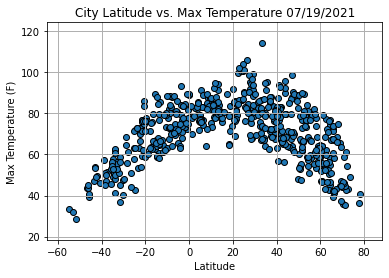

In [10]:
x_values = data_df["Lat"]
y_values = data_df["Max Temp"]

plt.scatter(x_values,y_values, edgecolor = 'black')
plt.title("City Latitude vs. Max Temperature 07/19/2021")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(linestyle = '-', linewidth = 1)

plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 10, max(y_values) + 10)

xticks = np.arange(-60, 85, 20)
plt.xticks(xticks)

#plt.show()
plt.savefig("../output_data/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

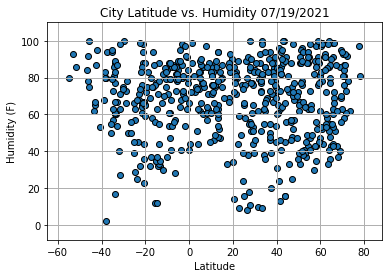

In [11]:
x_values = data_df["Lat"]
y_values = data_df["Humidity"]

plt.scatter(x_values,y_values, edgecolor = 'black')
plt.title("City Latitude vs. Humidity 07/19/2021")
plt.xlabel('Latitude')
plt.ylabel('Humidity (F)')
plt.grid(linestyle = '-', linewidth = 1)

plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 10, max(y_values) + 10)

xticks = np.arange(-60, 85, 20)
plt.xticks(xticks)

#plt.show()
plt.savefig("../output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

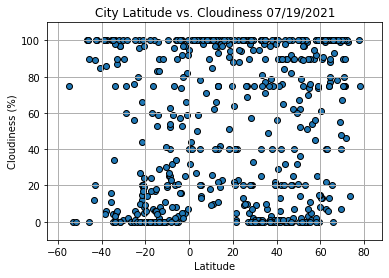

In [12]:
x_values = data_df["Lat"]
y_values = data_df["Cloudiness"]

plt.scatter(x_values,y_values, edgecolor = 'black')
plt.title("City Latitude vs. Cloudiness 07/19/2021")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle = '-', linewidth = 1)

plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 10, max(y_values) + 10)

xticks = np.arange(-60, 85, 20)
plt.xticks(xticks)

#plt.show()
plt.savefig("../output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

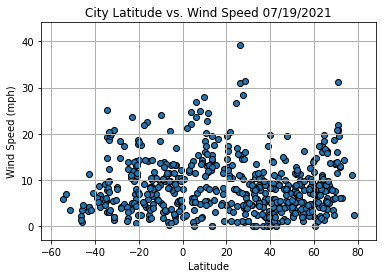

In [13]:
x_values = data_df["Lat"]
y_values = data_df["Wind Speed"]

plt.scatter(x_values,y_values, edgecolor = 'black')
plt.title("City Latitude vs. Wind Speed 07/19/2021")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(linestyle = '-', linewidth = 1)

plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 3, max(y_values) + 5)

xticks = np.arange(-60, 85, 20)
plt.xticks(xticks)

#plt.show()
plt.savefig("../output_data/City Latitude vs Wind Speed.png")

## Linear Regression

In [14]:
def do_linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x,y, edgecolor = 'black')
    plt.plot(x,regress_values,"r-")
    
    correlation = st.pearsonr(x, y)
    print(f"The Pearson correlation is: {round(correlation[0],2)}")
    print(f"The line equation is: {line_eq}")
    return 

In [15]:
# Northern Hemisphere is where Lat >= 0
north_hemi = data_df.loc[(data_df["Lat"] >= 0), :]

# Southern Hemisphere is where Lat < 0
south_hemi = data_df.loc[(data_df["Lat"] < 0), :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Pearson correlation is: -0.65
The line equation is: y = -0.47x + 91.57


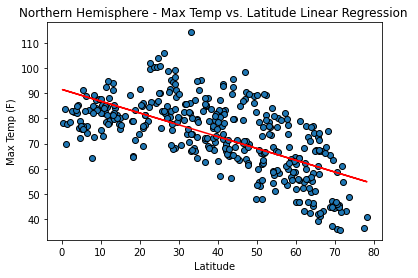

In [16]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]

do_linear_regression(x_values, y_values)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression ")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
# plt.annotate(line_eq,(0,0),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The Pearson correlation is: 0.8
The line equation is: y = 0.84x + 82.6


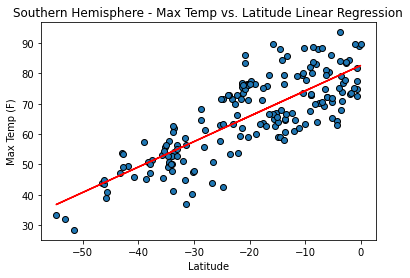

In [17]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]

do_linear_regression(x_values, y_values)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
# plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Pearson correlation is: -0.0
The line equation is: y = -0.0x + 68.68


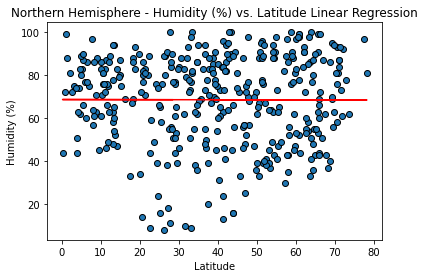

In [18]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]

do_linear_regression(x_values, y_values)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# plt.annotate(line_eq,(50,10),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Pearson correlation is: -0.04
The line equation is: y = -0.06x + 66.52


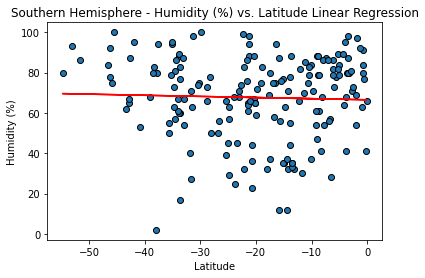

In [19]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]

do_linear_regression(x_values, y_values)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Pearson correlation is: 0.01
The line equation is: y = 0.02x + 57.69


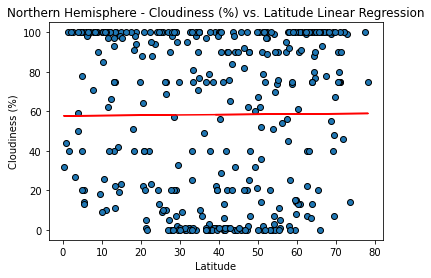

In [20]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]

do_linear_regression(x_values, y_values)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Pearson correlation is: -0.1
The line equation is: y = -0.3x + 37.27


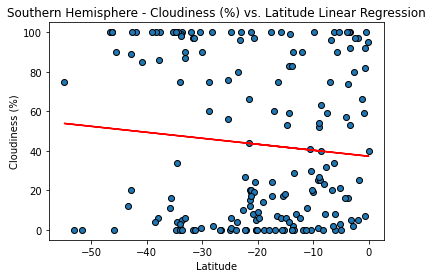

In [21]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]

do_linear_regression(x_values, y_values)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Pearson correlation is: -0.12
The line equation is: y = -0.04x + 10.08


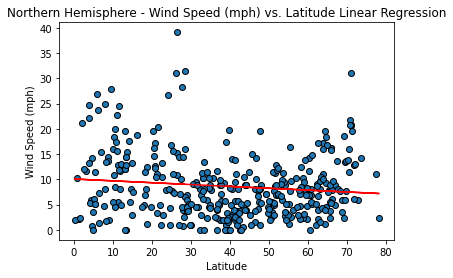

In [22]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]

do_linear_regression(x_values, y_values)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Pearson correlation is: 0.06
The line equation is: y = 0.03x + 8.94


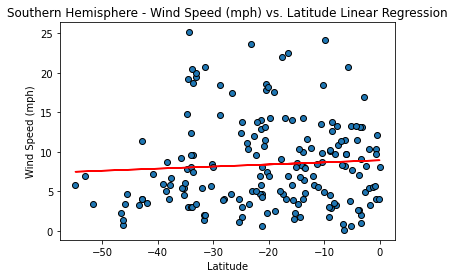

In [23]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]

do_linear_regression(x_values, y_values)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")